# Homework 1: Hopfield model

## Author: Aaron Beyen (GU Student)

### Packages

In [1]:
# Calculations
import numpy as np 
import random
from scipy.special import erf 
import itertools

# Plotting
import matplotlib.pyplot as plt # plot graphs
from matplotlib.colors import ListedColormap # plot digits
import pandas as pd


# Nice output display
import sympy as sp
from IPython.display import display
sp.init_printing()
%matplotlib notebook

# 1) One-step error probability

## Parameters

In [2]:
p = np.array([12,24,48,70,100,120]) # amount of random patterns
N = 120 # amount of bits
trials = 10**5 # amount of trials

prob = [] # one-step error probability
values = [-1,1] # possible values for the neurons

## Functions 

In [3]:
def sgn(x): # signum function with convention sgn(0) = 1
    return np.sign(x)+(x == 0)
    
def createW_m(m, diagonal, patterns): # store the random patterns using Hebb's rule
    W_m = 1/N*np.dot(patterns[m],patterns.transpose()) # calculate the m'th row of the W matrix (we only need this row)

    if diagonal: # put diagonal elements to 0 if diagonal = True
        W_m[m] = 0
    return W_m

def activation_function(w, x,theta):
    return sgn(np.dot(w, x)-theta)

def asynchronous_dynamics(w,s,theta):
    return activation_function(w, s,theta) #  value neuron m after change using the update rule
    

def error_probability(p,diagonal): # calculate one-step error probability for a set of patterns
    l = [] # probability list
    for i in range(len(p)):
        fails = 0  # amount of fails that happen for a given p_i

        for _ in range(trials):  
            patterns = np.random.choice(values, size = (N, p[i])) # create p_i random patterns, each with N elements -1 or +1
            m = np.random.randint(1,N) # take random integer between 1 and N for random neuron
            rp = np.random.randint(0, p[i]) # take random integer between 0 and p_i to choose a random pattern (= rp)
            
            old = patterns[m][rp] # value neuron m in the rp'th pattern before change

            W_m = createW_m(m,diagonal, patterns) # store the random patterns using Hebb's rule
            theta = 0 # we put the treshold to 0
            nieuw = asynchronous_dynamics(W_m, patterns.transpose()[rp],theta) # value neuron m in the rp'th pattern after change

            if nieuw != old: # error occured
                fails += 1

        l.append(fails/trials) # add the one-step error probability for this choice of p_i
    return l

## Calculate one-step error probability

In [4]:
# It takes some time to calculate both sets of probabilities. If you want only 1 set, put the others in comments
prob1 = error_probability(p, True) # one-step error probability for W_ii = 0
prob2 = error_probability(p, False) # one-step error probability for W_ii != 0

print('The one-step error probabilities using W_ii = 0 are ', prob1)
print('The one-step error probabilities using W_ii != 0 are ', prob2)

The one-step error probabilities using W_ii = 0 are  [0.00053, 0.01128, 0.05547, 0.0932, 0.136, 0.15883]
The one-step error probabilities using W_ii != 0 are  [0.00015, 0.00323, 0.01271, 0.01841, 0.02116, 0.02206]


## Plot error

<IPython.core.display.Javascript object>


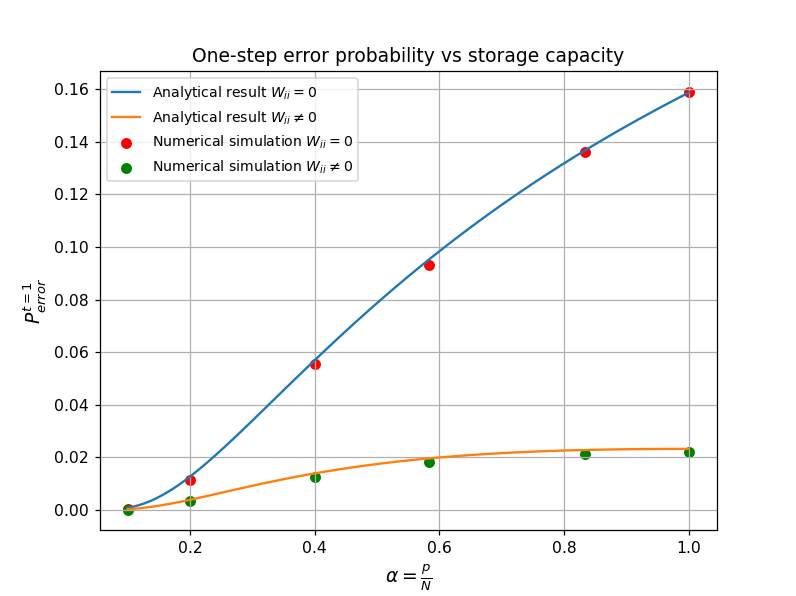

In [9]:
fig, ax = plt.subplots(1,1)

p_c = np.linspace(p[0], p[-1], 100) # p list to plot analytical result
mu_c = -(p_c-1)/N # mean value Gaussian distribution for W_ii != 0


plt.scatter(p/N,prob1, label = r'Numerical simulation $W_{ii} = 0$', color = 'red') # we only plot points (scatter) for the 
                                                                                    # numerical simulations (no full lines)
plt.scatter(p/N,prob2, label = r'Numerical simulation $W_{ii} \neq 0$', color = 'green')
plt.plot(p_c/N, 0.5*(1-erf(np.sqrt(N/(2*p_c)))), label = 'Analytical result $W_{ii} = 0$')
plt.plot(p_c/N, 0.5*(1-erf( (1-mu_c)* np.sqrt(N/(2*p_c)))), label = r'Analytical result $W_{ii} \neq 0$')


plt.title(r'One-step error probability vs storage capacity')
plt.xlabel(r'$\alpha = \frac{p}{N}$', fontsize = 12)
plt.ylabel('$P_{error}^{t = 1}$', fontsize = 12)

plt.grid()
plt.legend(loc = 'upper left', fontsize = 9)

plt.show()

# 2) Recognising digits

## Parameters

In [6]:
# Patterns 

## digit 0:
x1=[ [ -1, -1, -1, -1, -1, -1, -1, -1, -1, -1],[ -1, -1, -1, 1, 1, 1, 1, -1, -1, -1],[ -1, -1, 1, 1, 1, 1, 1, 1, -1, -1],[ -1, 1, 1, 1, -1, -1, 1, 1, 1, -1],[ -1, 1, 1, 1, -1, -1, 1, 1, 1, -1],[ -1, 1, 1, 1, -1, -1, 1, 1, 1, -1],[ -1, 1, 1, 1, -1, -1, 1, 1, 1, -1],[ -1, 1, 1, 1, -1, -1, 1, 1, 1, -1],[ -1, 1, 1, 1, -1, -1, 1, 1, 1, -1],[ -1, 1, 1, 1, -1, -1, 1, 1, 1, -1],[ -1, 1, 1, 1, -1, -1, 1, 1, 1, -1],[ -1, 1, 1, 1, -1, -1, 1, 1, 1, -1],[ -1, 1, 1, 1, -1, -1, 1, 1, 1, -1],[ -1, -1, 1, 1, 1, 1, 1, 1, -1, -1],[ -1, -1, -1, 1, 1, 1, 1, -1, -1, -1],[ -1, -1, -1, -1, -1, -1, -1, -1, -1, -1] ]

## digit 1:
x2=[ [ -1, -1, -1, 1, 1, 1, 1, -1, -1, -1],[ -1, -1, -1, 1, 1, 1, 1, -1, -1, -1],[ -1, -1, -1, 1, 1, 1, 1, -1, -1, -1],[ -1, -1, -1, 1, 1, 1, 1, -1, -1, -1],[ -1, -1, -1, 1, 1, 1, 1, -1, -1, -1],[ -1, -1, -1, 1, 1, 1, 1, -1, -1, -1],[ -1, -1, -1, 1, 1, 1, 1, -1, -1, -1],[ -1, -1, -1, 1, 1, 1, 1, -1, -1, -1],[ -1, -1, -1, 1, 1, 1, 1, -1, -1, -1],[ -1, -1, -1, 1, 1, 1, 1, -1, -1, -1],[ -1, -1, -1, 1, 1, 1, 1, -1, -1, -1],[ -1, -1, -1, 1, 1, 1, 1, -1, -1, -1],[ -1, -1, -1, 1, 1, 1, 1, -1, -1, -1],[ -1, -1, -1, 1, 1, 1, 1, -1, -1, -1],[ -1, -1, -1, 1, 1, 1, 1, -1, -1, -1],[ -1, -1, -1, 1, 1, 1, 1, -1, -1, -1] ]

## digit 2:
x3=[ [ 1, 1, 1, 1, 1, 1, 1, 1, -1, -1],[ 1, 1, 1, 1, 1, 1, 1, 1, -1, -1],[ -1, -1, -1, -1, -1, 1, 1, 1, -1, -1],[ -1, -1, -1, -1, -1, 1, 1, 1, -1, -1],[ -1, -1, -1, -1, -1, 1, 1, 1, -1, -1],[ -1, -1, -1, -1, -1, 1, 1, 1, -1, -1],[ -1, -1, -1, -1, -1, 1, 1, 1, -1, -1],[ 1, 1, 1, 1, 1, 1, 1, 1, -1, -1],[ 1, 1, 1, 1, 1, 1, 1, 1, -1, -1],[ 1, 1, 1, -1, -1, -1, -1, -1, -1, -1],[ 1, 1, 1, -1, -1, -1, -1, -1, -1, -1],[ 1, 1, 1, -1, -1, -1, -1, -1, -1, -1],[ 1, 1, 1, -1, -1, -1, -1, -1, -1, -1],[ 1, 1, 1, -1, -1, -1, -1, -1, -1, -1],[ 1, 1, 1, 1, 1, 1, 1, 1, -1, -1],[ 1, 1, 1, 1, 1, 1, 1, 1, -1, -1] ]

## digit 3:
x4=[ [ -1, -1, 1, 1, 1, 1, 1, 1, -1, -1],[ -1, -1, 1, 1, 1, 1, 1, 1, 1, -1],[ -1, -1, -1, -1, -1, -1, 1, 1, 1, -1],[ -1, -1, -1, -1, -1, -1, 1, 1, 1, -1],[ -1, -1, -1, -1, -1, -1, 1, 1, 1, -1],[ -1, -1, -1, -1, -1, -1, 1, 1, 1, -1],[ -1, -1, -1, -1, -1, -1, 1, 1, 1, -1],[ -1, -1, 1, 1, 1, 1, 1, 1, -1, -1],[ -1, -1, 1, 1, 1, 1, 1, 1, -1, -1],[ -1, -1, -1, -1, -1, -1, 1, 1, 1, -1],[ -1, -1, -1, -1, -1, -1, 1, 1, 1, -1],[ -1, -1, -1, -1, -1, -1, 1, 1, 1, -1],[ -1, -1, -1, -1, -1, -1, 1, 1, 1, -1],[ -1, -1, -1, -1, -1, -1, 1, 1, 1, -1],[ -1, -1, 1, 1, 1, 1, 1, 1, 1, -1],[ -1, -1, 1, 1, 1, 1, 1, 1, -1, -1] ]

## digit 4:
x5=[ [ -1, 1, 1, -1, -1, -1, -1, 1, 1, -1],[ -1, 1, 1, -1, -1, -1, -1, 1, 1, -1],[ -1, 1, 1, -1, -1, -1, -1, 1, 1, -1],[ -1, 1, 1, -1, -1, -1, -1, 1, 1, -1],[ -1, 1, 1, -1, -1, -1, -1, 1, 1, -1],[ -1, 1, 1, -1, -1, -1, -1, 1, 1, -1],[ -1, 1, 1, -1, -1, -1, -1, 1, 1, -1],[ -1, 1, 1, 1, 1, 1, 1, 1, 1, -1],[ -1, 1, 1, 1, 1, 1, 1, 1, 1, -1],[ -1, -1, -1, -1, -1, -1, -1, 1, 1, -1],[ -1, -1, -1, -1, -1, -1, -1, 1, 1, -1],[ -1, -1, -1, -1, -1, -1, -1, 1, 1, -1],[ -1, -1, -1, -1, -1, -1, -1, 1, 1, -1],[ -1, -1, -1, -1, -1, -1, -1, 1, 1, -1],[ -1, -1, -1, -1, -1, -1, -1, 1, 1, -1],[ -1, -1, -1, -1, -1, -1, -1, 1, 1, -1] ]



## start patterns:

start1 = [[-1, -1, -1, 1, 1, 1, 1, -1, -1, -1], [-1, -1, -1, 1, 1, 1, 1, -1, -1, -1], [-1, -1, -1, 1, 1, 1, 1, 1, -1, -1], [-1, -1, -1, 1, -1, 1, 1, 1, -1, -1], [-1, -1, -1, 1, -1, 1, 1, 1, -1, -1], [-1, -1, -1, 1, -1, 1, 1, 1, -1, -1], [-1, -1, -1, 1, -1, 1, 1, 1, -1, -1], [-1, 1, 1, 1, 1, 1, 1, 1, -1, -1], [-1, 1, 1, 1, 1, 1, 1, 1, -1, -1], [-1, 1, 1, 1, -1, -1, 1, -1, -1, -1], [-1, 1, 1, 1, -1, -1, 1, -1, -1, -1], [-1, 1, 1, 1, -1, -1, 1, -1, -1, -1], [-1, 1, 1, 1, -1, -1, 1, -1, -1, -1], [-1, -1, 1, 1, 1, 1, 1, -1, -1, -1], [-1, -1, -1, 1, 1, 1, 1, -1, -1, -1], [-1, -1, -1, 1, 1, 1, 1, -1, -1, -1]]
start2 = [[1, -1, -1, 1, 1, 1, 1, -1, -1, 1], [-1, 1, 1, -1, -1, -1, -1, 1, 1, -1], [-1, 1, 1, -1, -1, -1, -1, 1, 1, -1], [-1, 1, 1, -1, -1, -1, -1, 1, 1, -1], [-1, 1, 1, -1, -1, -1, -1, 1, 1, -1], [-1, 1, 1, -1, -1, -1, -1, 1, 1, -1], [-1, 1, 1, -1, -1, -1, -1, 1, 1, -1], [-1, 1, 1, 1, 1, 1, 1, 1, 1, -1], [-1, 1, 1, 1, 1, 1, 1, 1, 1, -1], [-1, -1, -1, -1, -1, -1, -1, 1, 1, -1], [-1, -1, -1, -1, -1, -1, -1, 1, 1, -1], [-1, -1, -1, -1, -1, -1, -1, 1, 1, -1], [-1, -1, -1, -1, -1, -1, -1, 1, 1, -1], [-1, -1, -1, -1, -1, -1, -1, 1, 1, -1], [-1, -1, -1, -1, -1, -1, -1, 1, 1, -1], [-1, -1, -1, -1, -1, -1, -1, 1, 1, -1]]
start3 = [[-1, 1, 1, -1, -1, -1, -1, 1, 1, -1], [-1, 1, 1, -1, -1, -1, -1, 1, 1, -1], [-1, 1, 1, -1, -1, -1, -1, 1, 1, -1], [-1, 1, 1, -1, -1, -1, -1, 1, 1, -1], [-1, 1, 1, -1, -1, -1, -1, 1, 1, -1], [-1, 1, 1, -1, -1, -1, -1, 1, 1, -1], [-1, 1, 1, -1, -1, -1, -1, 1, 1, -1], [-1, 1, 1, 1, 1, 1, 1, 1, 1, -1], [-1, 1, 1, 1, 1, 1, 1, 1, 1, -1], [-1, -1, -1, -1, -1, -1, -1, 1, 1, -1], [-1, -1, -1, -1, -1, -1, -1, 1, 1, -1], [-1, -1, -1, -1, -1, -1, -1, 1, 1, -1], [-1, -1, -1, -1, -1, -1, -1, 1, 1, -1], [-1, -1, -1, -1, -1, -1, -1, 1, 1, -1], [-1, -1, -1, -1, -1, -1, -1, 1, 1, -1], [1, 1, 1, 1, 1, 1, 1, -1, -1, 1]]


N = len(x1)*len(x1[0]) # amount of digits (same for all x_i)

## Functions

In [7]:
def sgn(x): # signum function with convention sgn(0) = 1
    return np.sign(x)+(x == 0)

def make_vector(x): # turn matrix of size 16 x 10 into one big vector (easier to work with)
    l = [] 
    for i in range(len(x)):
        for j in range(len(x[i])):
            l.append(x[i][j])
    return np.array(l)

def make_matrix(x): # turn vector in matrix of size 16 x 10 (to get prefered output for OpenTA)
    l = []
    for i in range(16):
        row = []
        for j in range(10*i,10*i+10):
            row.append(x[j])
        l.append(row)  
    return l

def activation_function(w,s):
    return sgn(np.dot(w, s))

def asynchronous_update(x): # Asyncrhronous update rule with typewriter scheme
    l = []
    for i in range(N): # by going through all i in the vector form of x, we follow typrewriter scheme
        W_i = 1/N*np.dot(patterns[i],patterns.transpose()) # calculate the m'th row of the W matrix (we only need this row)
        W_i[i] = 0 # put W_ii = 0

        nieuw = activation_function(W_i,x) # update the i'th neuron
        
        l.append(nieuw)
        
    return np.array(l)

def steady_state(s):
    while (asynchronous_update(s)==s).all() == False: # keep updating until steady state is reached: s(t) = s(t+N)
        s = asynchronous_update(s)
    return s

## Convergence to steady state

In [8]:
x1_v = make_vector(x1) # convert to vector form for easier manipulations. v stands for vector
x2_v = make_vector(x2)
x3_v = make_vector(x3)
x4_v = make_vector(x4)
x5_v = make_vector(x5)
start1_v = make_vector(start1)
start2_v = make_vector(start2)
start3_v = make_vector(start3)

patterns = np.array([x1_v, x2_v,x3_v,x4_v,x5_v]).transpose()

steady1 = steady_state(start1_v) # calculate the steady state
steady2 = steady_state(start2_v)
steady3 = steady_state(start3_v)

steady1_m = make_matrix(steady1) # convert to 16 x 10 matrix for in OpenTA. m stands for matrix
steady2_m = make_matrix(steady2)
steady3_m = make_matrix(steady3)

print('The first pattern converges to ', steady1_m)
print()
print('The second pattern converges to ', steady2_m)
print()
print('The third pattern converges to ', steady3_m)

The first pattern converges to  [[-1.0, -1.0, -1.0, 1.0, 1.0, 1.0, 1.0, -1.0, -1.0, -1.0], [-1.0, -1.0, -1.0, 1.0, 1.0, 1.0, 1.0, -1.0, -1.0, -1.0], [-1.0, -1.0, -1.0, 1.0, 1.0, 1.0, 1.0, 1.0, -1.0, -1.0], [-1.0, -1.0, -1.0, 1.0, -1.0, 1.0, 1.0, 1.0, -1.0, -1.0], [-1.0, -1.0, -1.0, 1.0, -1.0, 1.0, 1.0, 1.0, -1.0, -1.0], [-1.0, -1.0, -1.0, 1.0, -1.0, 1.0, 1.0, 1.0, -1.0, -1.0], [-1.0, -1.0, -1.0, 1.0, -1.0, 1.0, 1.0, 1.0, -1.0, -1.0], [-1.0, -1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, -1.0, -1.0], [-1.0, -1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, -1.0, -1.0], [-1.0, 1.0, 1.0, 1.0, -1.0, -1.0, 1.0, -1.0, -1.0, -1.0], [-1.0, 1.0, 1.0, 1.0, -1.0, -1.0, 1.0, -1.0, -1.0, -1.0], [-1.0, 1.0, 1.0, 1.0, -1.0, -1.0, 1.0, -1.0, -1.0, -1.0], [-1.0, 1.0, 1.0, 1.0, -1.0, -1.0, 1.0, -1.0, -1.0, -1.0], [-1.0, -1.0, 1.0, 1.0, 1.0, 1.0, 1.0, -1.0, -1.0, -1.0], [-1.0, -1.0, -1.0, 1.0, 1.0, 1.0, 1.0, -1.0, -1.0, -1.0], [-1.0, -1.0, -1.0, 1.0, 1.0, 1.0, 1.0, -1.0, -1.0, -1.0]]

The second pattern converges to  [[-1.0, 1.0

## Classify steady state

In [9]:
# dictionary with pattrn index for each pattern
dictionary = {str(x1_v): 1, str(-x1_v): -1, str(x2_v): 2, str(-x2_v): -2, str(x3_v): 3, str(-x3_v): -3, str(x4_v): 4, str(-x4_v): -4, str(x5_v): 5, str(-x5_v): 5}

mu1 = dictionary.get(str(steady1), 6) # get the pattern index for the steady state. 6 means steady state not in dictionary

mu2 = dictionary.get(str(steady2), 6)

mu3 = dictionary.get(str(steady3), 6)

print('The pattern index of the first steady state is ', mu1)
print('The pattern index of the second steady state is ', mu2)
print('The pattern index of the third steady state is ', mu3)

The pattern index of the first steady state is  6
The pattern index of the second steady state is  6
The pattern index of the third steady state is  6


## Plot patterns

### Normal digits

<ipython-input-36-f27d2df04f6c>:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.matshow(z, cmap = cmap)


<IPython.core.display.Javascript object>


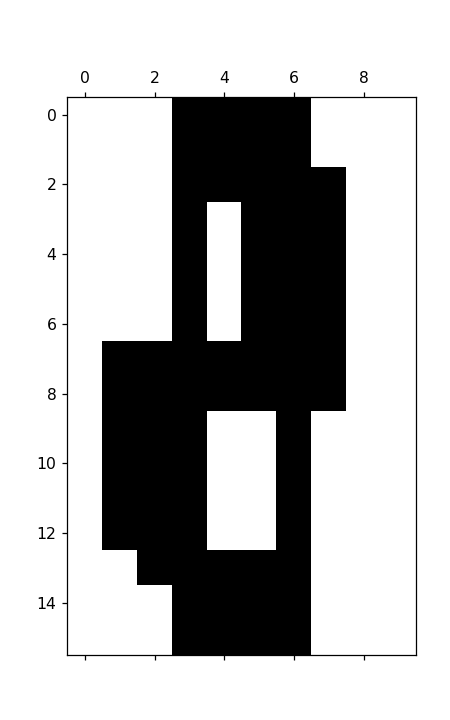

' \nplt.matshow(make_matrix((x1_v+1)/2), cmap = cmap)  # plot the pattern. Matshow works with 0 and 1\n                                                  # so the map x_i to (x_i+1)/2 converts -1 to 0 and 1 to 1\nplt.matshow(make_matrix((x2_v+1)/2), cmap = cmap)\nplt.matshow(make_matrix((x3_v+1)/2), cmap = cmap)\nplt.matshow(make_matrix((x4_v+1)/2), cmap = cmap)\nplt.matshow(make_matrix((x5_v+1)/2), cmap = cmap)\n'

In [36]:
cmap = ListedColormap(['white', 'black']) # colours of pixels

xq = np.array(sgn(x1_v+x2_v+x3_v))
z = make_matrix((xq+1)/2)
plt.matshow(z, cmap = cmap)

''' 
plt.matshow(make_matrix((x1_v+1)/2), cmap = cmap)  # plot the pattern. Matshow works with 0 and 1
                                                  # so the map x_i to (x_i+1)/2 converts -1 to 0 and 1 to 1
plt.matshow(make_matrix((x2_v+1)/2), cmap = cmap)
plt.matshow(make_matrix((x3_v+1)/2), cmap = cmap)
plt.matshow(make_matrix((x4_v+1)/2), cmap = cmap)
plt.matshow(make_matrix((x5_v+1)/2), cmap = cmap)
'''

### Initial (distorted) patterns

<IPython.core.display.Javascript object>


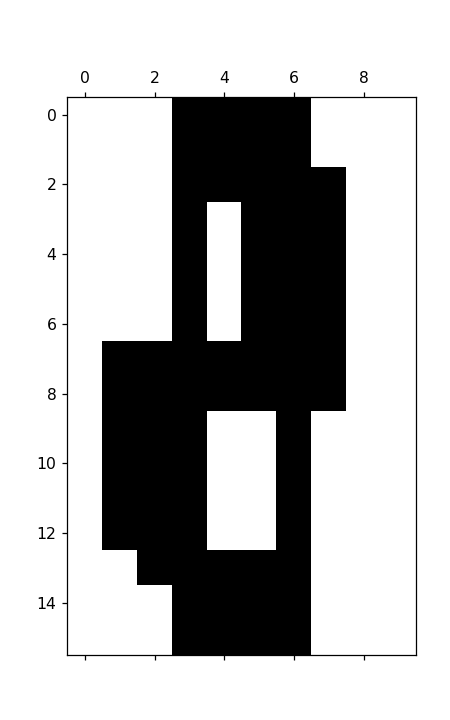

<IPython.core.display.Javascript object>


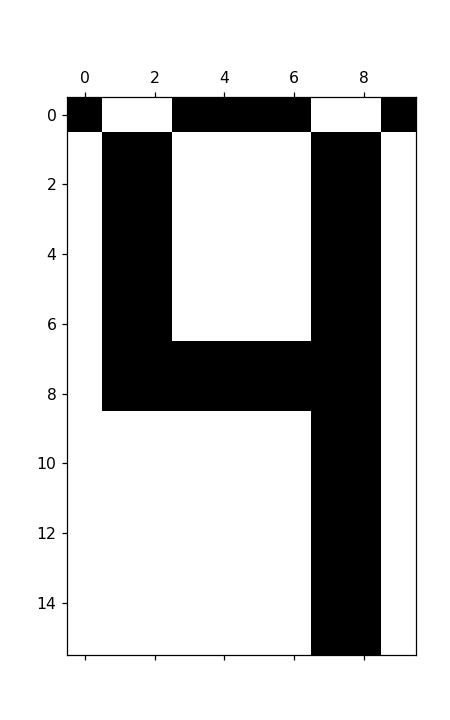

<IPython.core.display.Javascript object>


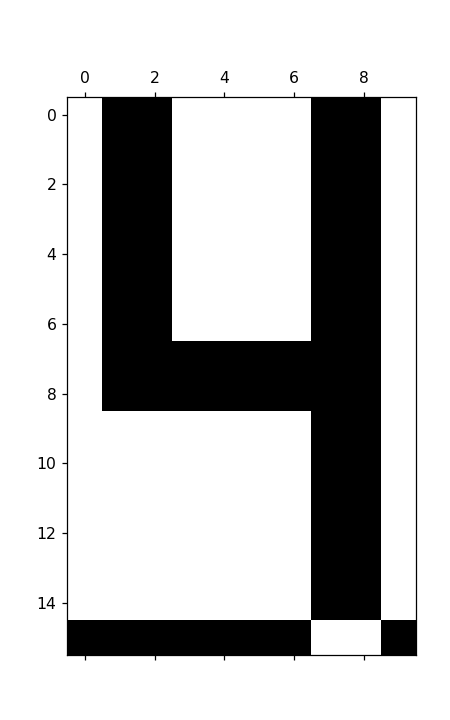

In [11]:
plt.matshow(make_matrix((start1_v+1)/2), cmap = cmap)
plt.matshow(make_matrix((start2_v+1)/2), cmap = cmap)
plt.matshow(make_matrix((start3_v+1)/2), cmap = cmap)

### Steady state patterns

<IPython.core.display.Javascript object>


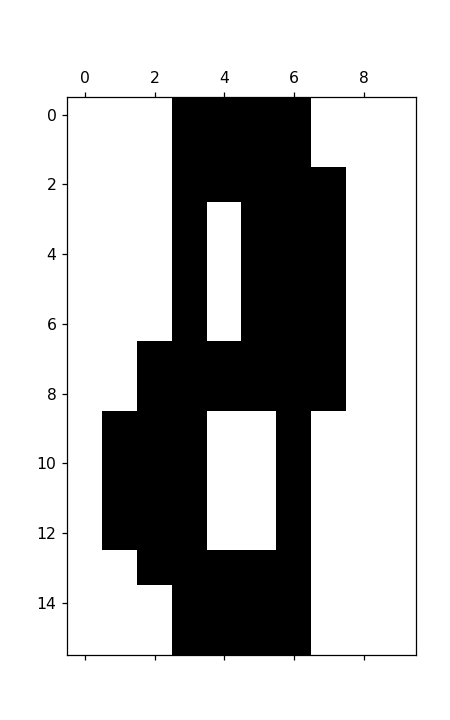

<IPython.core.display.Javascript object>


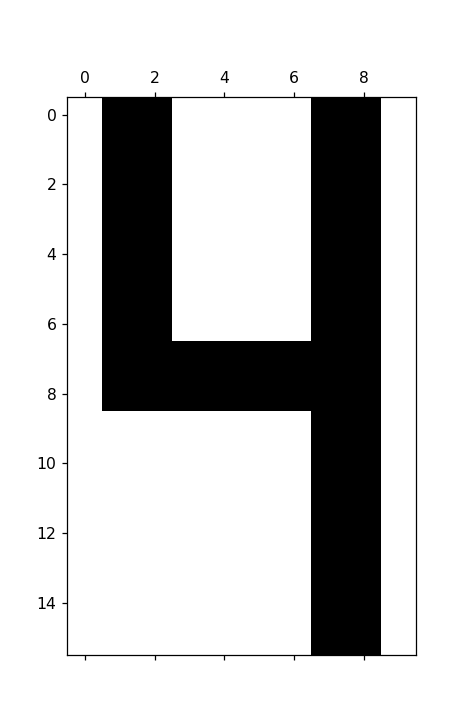

<IPython.core.display.Javascript object>


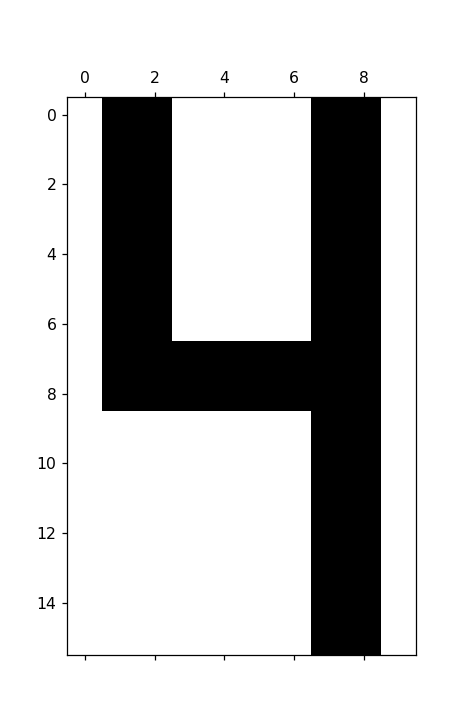

In [12]:
plt.matshow(make_matrix((steady1+1)/2), cmap = cmap)
plt.matshow(make_matrix((steady2+1)/2), cmap = cmap)
plt.matshow(make_matrix((steady3+1)/2), cmap = cmap)

# 3) Boolean functions

## Parameters

In [13]:
eta = 0.05 # learning rate
M = [2,3,4,5] # Boolean dimensions
    
neurons = [-1,1] # values of the neurons
trials = 10**4 # maximum amount of Boolean functions tested
maxi = 20 # total amount training iterations for each trial

exact = [14,104,1882,94572] # Exact amount of linear seperable functions
                            # Source: https://en.wikipedia.org/wiki/Linear_separability
    
total = [16,256, 65536, 4294967296] # in total there are 2**(2**n) Boolean functions in dimension n

stop = np.minimum(total, trials) # for large n, 2^2^n trials is too big, so we choose make a maximum of 10^4 trials

expected = np.round(np.array(exact)/np.array(total)*stop,3) # expected amount of observations for 'stop' trials

## Functions

In [14]:
def sgn(x): # signum function with convention sgn(0) = 1
    return np.sign(x)+(x == 0)
    
def booleanf(n): # creates a random Boolean function as an array of -1 and 1
    return np.random.choice(neurons, size = (1, 2**n))[0]

def activation_function(s, w, theta): # determine new output
    return sgn(np.einsum('j,ij->i', w, x)-theta)  # we multiply the row vector w with each of the coloum vectors of x using einsum

def error(f,x,w,theta): # compares output to requested result by calculating the error. If 0 error, f is linear seperable
    error = abs(f-activation_function(x,w,theta)) 
    return np.sum(error) # total error

def testf(f,x,n): # test if the given n-dimensional function is linear seperable
    w = np.random.normal(0, 1/n, n) # initialise the weights from a normal distribution with mean zero and variance 1/n
    theta = 0 # initialise the threshold with 0 value
    
    for _ in range(maxi): # train the algorithm maxi times
        o = activation_function(x,w,theta)
        w += eta*np.einsum('i,ij->j', f-o, x) # train w matrix by adding dw matrix. einsum performs dw_j = eta*(f_i-o_i)* x_ij 
        # where we sum over i and j and put everything in a matrix in the end
        theta += -eta*np.sum(f-o) # train theta by adding dtheta
        
    E = error(f,x,w,theta)
    
    if E == 0:
        return True # f is linear seperable so return true
    else:
        return False # f is not linear seperable for 20 training iterations

## Sampling Boolean functions and training the network

In [15]:
seperable = []
plot = False
value = []

for n in M: # n goes from 2 to 5
    dictionary = {}  # dictionary of the sampled Boolean functions
    succes = 0 # amount of time the functions is linear seperable
    x = np.array(list(map(list, itertools.product(neurons, repeat=n)))) # all combinations of n binary values -1 and 1
    stop = min(2**(2**n), trials) # maximum amount of trials

    while len(dictionary) != stop: # stop when the maximum amount of trials is reached
        f = booleanf(n)
        while str(f) in dictionary: # Check if sampled function is already in dictionary
            f = booleanf(n)
        dictionary[str(f)] = 1 # add new function to dictionary

        if testf(f, x, n, plot): # if the test result is True
            succes += 1 # sampled function is linear seperable
    seperable.append(succes)

seperable

## Table of results

In [16]:
rel_error = np.round(abs(expected-seperable)/np.array(expected),3) # relative error of the simulation

df = pd.DataFrame([(M[0], seperable[0], expected[0], rel_error[0]), # make table
                   (M[1], seperable[1], expected[1], rel_error[1]),
                   (M[2], seperable[2], expected[2], rel_error[2]), 
                    (M[3], seperable[3], expected[3], rel_error[3])],
                    columns=('Dimension', 'Result simulation', 'Expected result', 'Relative error'))
df = df.set_index('Dimension')
df

,Result simulation,Expected result,Relative error
Dimension,,,
2,14,14.00,0.00
3,104,104.00,0.00
4,293,287.17,0.02
5,0,0.22,1.00


## Plot for n = 2

### Functions

In [58]:
def testf_plot(f,x,n): # test if the given n-dimensional function is linear seperable
    w = np.random.normal(0, 1/n, n) # initialise the weights from a normal distribution with mean zero and variance 1/n
    theta = 0 # initialise the threshold with 0 value
    
    value = [[w[i] for i in range(n)]] # collects all values for w and theta to plot later.
    value[0].append(theta) # add theta to the list
    
    for j in range(maxi): # train the algorithm maxi times
        o = activation_function(x,w,theta)
        w += eta*np.einsum('i,ij->j', f-o, x) # train w matrix by adding dw matrix. einsum performs dw_j = eta*(f_i-o_i)* x_ij 
        # where we sum over i and j and put everything in a matrix in the end
        theta += -eta*np.sum(f-o) # train theta by adding dtheta
        
        value.append([w[i] for i in range(n)]) # collects all values for w and theta to plot later. If not necessary, put in comments
        value[j+1].append(theta)
              
    plotline(f,value,x)
    
    return

def plotf(f,x):
    
    for i in range(len(f)): # plot the Boolean function
        if f[i] > 0:
            plt.plot(x[i][0], x[i][1], 'go') # +1 is indicated with a green point
        else:
            plt.plot(x[i][0], x[i][1], 'ro') # -1 is indicated with a red point
    return

def plotline(f,value,x): # we plot all the lines from the algorithm for n = 2 to see how it learns
    
    b = np.linspace(-2,2,100) # line variable

    fig, ax = plt.subplots(1,1) # create figure
    
    plotf(f,x) # plot the boolean function
    

            
    label = ['try 1', 'try 2', 'try 3', 'try 4', 'last try'] # labels for the lines
    
    for i in range(len(value)):
        if i in [0,1,2,3]: # plot and label first few lines
            plt.plot(b, -np.array(value[i][0])/np.array(value[i][1])*b+np.array(value[i][2])/np.array(value[i][1]), label = label[i])
        
        elif i == len(value)-1: # plot and label last line
            plt.plot(b, -np.array(value[i][0])/np.array(value[i][1])*b+np.array(value[i][2])/np.array(value[i][1]), label = label[4])        
        
        else: # plot all intermediate lines
            plt.plot(b, -np.array(value[i][0])/np.array(value[i][1])*b+np.array(value[i][2])/np.array(value[i][1]))
    
    plt.title(r'Illustration learning algorithm for Boolean functions')
    plt.xlabel(r'$x_{1}$', fontsize = 12)
    plt.ylabel('$x_{2}$', fontsize = 12)

    plt.grid()
    plt.xlim([-2,2])
    plt.ylim([-2,2])
    
    plt.legend()
    plt.show()
    
    print(value)
    
    return

### Graphing

<IPython.core.display.Javascript object>


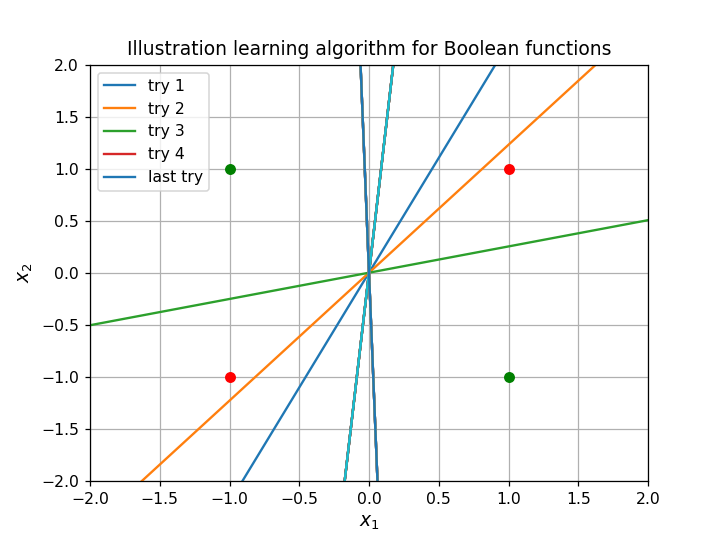

[[0.4516711608664893, -0.2044964297805148, 0], [0.2516711608664893, -0.2044964297805148, 0.0], [0.05167116086648926, -0.2044964297805148, 0.0], [0.05167116086648926, -0.004496429780514788, 0.0], [-0.14832883913351075, -0.004496429780514788, 0.0], [0.05167116086648926, -0.004496429780514788, 0.0], [-0.14832883913351075, -0.004496429780514788, 0.0], [0.05167116086648926, -0.004496429780514788, 0.0], [-0.14832883913351075, -0.004496429780514788, 0.0], [0.05167116086648926, -0.004496429780514788, 0.0], [-0.14832883913351075, -0.004496429780514788, 0.0], [0.05167116086648926, -0.004496429780514788, 0.0], [-0.14832883913351075, -0.004496429780514788, 0.0], [0.05167116086648926, -0.004496429780514788, 0.0], [-0.14832883913351075, -0.004496429780514788, 0.0], [0.05167116086648926, -0.004496429780514788, 0.0], [-0.14832883913351075, -0.004496429780514788, 0.0], [0.05167116086648926, -0.004496429780514788, 0.0], [-0.14832883913351075, -0.004496429780514788, 0.0], [0.05167116086648926, -0.0044964

In [111]:
m = 2

dictionary = {}  # dictionary of the sampled Boolean functions
x = np.array(list(map(list, itertools.product(neurons, repeat=m)))) # all combinations of n binary values -1 and 1
stop = 2**(2**m)*0+1

while len(dictionary) != stop: # stop when the maximum amount of trials is reached
    f = booleanf(m)
    while str(f) in dictionary: # Check if sampled function is already in dictionary
        f = booleanf(m)
    dictionary[str(f)] = 1 # add new function to dictionary

testf_plot(f, x, m) # if the test result is True        

In [57]:
value